<a href="https://colab.research.google.com/github/anuradha-datascience/NLP/blob/main/Assignment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Description
Description of Data:


Summary — text of the review

 Perform EDA and necessary pre-processing steps in dataset. (2 Mark)

Using the LDA algorithm create the Topics (Min 10) for the Corpus (2 Mark)

NOTE: Use Summary Column

Compute the coherence score and print Topics Extracted. (2 Mark)

Visualize the topics (1 Mark)

Plot the dependency parser for any two random sentences from the entire
corpus/dataset that has at least 10 words in the sentence. Make sure that dependency

parser looks good and should visually understandable. (3 Mark)

# Load Data

In [1]:
import pandas as pd
df=pd.read_csv("Mobile Accessories.csv")
df.head()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary
0,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent!!,One of the most comfortable masks available in...
1,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Good mask,Quality is good and good to use . size is for ...
2,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,The best in range,Super bass with very good spec.... amazing ne...
3,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent Product,Top notch product amongst other items in the m...
4,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent product,Very comfortable..


# EDA and Text Preprocessing - Summary Column

In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#  download resources  for preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Visualize Number of words before preprocessing


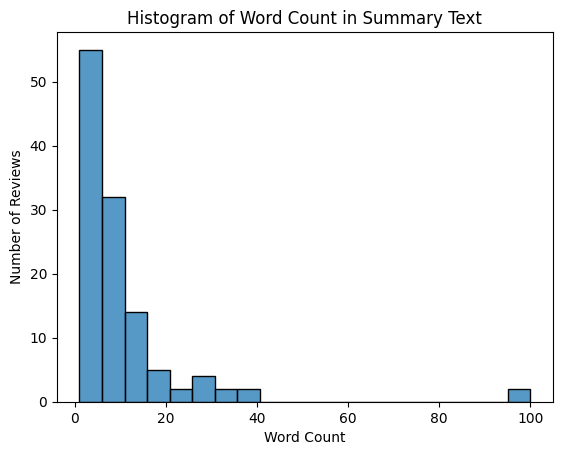

In [3]:
# Tokenize the summary text and count the number of words
df['word_count'] = df['Summary'].apply(lambda x: len(word_tokenize(x)))

# Plot histogram using Seaborn
sns.histplot(df['word_count'], bins=20, kde=False)
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Word Count in Summary Text')
plt.show()

## Preprocess Summary Text

In [4]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word not in string.punctuation]

    # Add punctuation to stop words
    stop_words = set(stopwords.words('english'))
    stop_words.update(set(string.punctuation))

    # Keep only alphabetic words
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize based on POS tags
    lemmatized_tokens = []
    for word, pos in pos_tags:
        if pos.startswith('NN'):  # Noun
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='n'))
        elif pos.startswith('VB'):  # Verb
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='v'))
        elif pos.startswith('JJ'):  # Adjective
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='a'))
        elif pos.startswith('RB'):  # Adverb
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='r'))
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(word))

    return lemmatized_tokens

# Apply preprocessing to the summary text column
df['clean_summary_text'] = df['Summary'].apply(preprocess_text)

# Display the DataFrame with cleaned text
df.head()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,word_count,clean_summary_text
0,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent!!,One of the most comfortable masks available in...,30,"[one, comfortable, mask, available, market, we..."
1,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Good mask,Quality is good and good to use . size is for ...,29,"[quality, good, good, use, size, person, big, ..."
2,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,The best in range,Super bass with very good spec.... amazing ne...,9,"[super, bass, good, spec, amaze, neckband]"
3,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent Product,Top notch product amongst other items in the m...,18,"[top, notch, product, amongst, item, market, m..."
4,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent product,Very comfortable..,3,[comfortable]


## Visualize Number of words after preprocessing


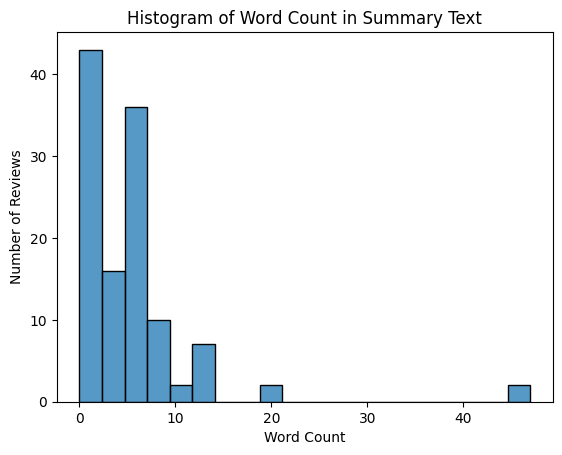

In [5]:
# Tokenize the summary text and count the number of words
df['word_count_clean'] = df['clean_summary_text'].apply(lambda x: len(x))

# Create a subset of DataFrame for plotting
df_sub = df[['word_count_clean']].copy()

# Plot histogram using Seaborn
sns.histplot(df_sub['word_count_clean'], bins=20, kde=False)
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Word Count in Summary Text')
plt.show()


Number of words has drastically reduced after preprocessing

# Using the LDA algorithm create the Topics (Min 10) for the Corpus (2 Mark)

In [6]:
#import libraries
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [7]:
# Create Corpus of preprocessed tokens - list of token lists
data_words=df['clean_summary_text'].tolist()
print(data_words[2:5])

[['super', 'bass', 'good', 'spec', 'amaze', 'neckband'], ['top', 'notch', 'product', 'amongst', 'item', 'market', 'military', 'standard', 'quality', 'keep'], ['comfortable']]


In [8]:
# create dictionary and corpus
id2word=corpora.Dictionary(data_words)
corpus=[id2word.doc2bow(text) for text in data_words]
print(corpus[2:4])

[[(18, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(7, 1), (22, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]]


In [9]:
#print sample to view ids for some tokens
print(list(id2word.token2id.items())[20:30])

[('people', 20), ('person', 21), ('quality', 22), ('size', 23), ('use', 24), ('amaze', 25), ('bass', 26), ('neckband', 27), ('spec', 28), ('super', 29)]


In [10]:
#create lda model with number of topics as 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

# Compute the coherence score and print Topics Extracted. (2 Mark)

In [11]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42845140537256104


In [12]:
import pprint
pprint.pprint(lda_model.print_topics())

[(0,
  '0.040*"awesome" + 0.040*"choice" + 0.040*"always" + 0.040*"item" + '
  '0.040*"notch" + 0.040*"top" + 0.040*"amongst" + 0.040*"standard" + '
  '0.022*"build" + 0.022*"purchase"'),
 (1,
  '0.212*"charge" + 0.145*"fast" + 0.092*"good" + 0.080*"amaze" + '
  '0.054*"change" + 0.040*"look" + 0.033*"cable" + 0.027*"mask" + 0.014*"soft" '
  '+ 0.014*"touch"'),
 (2,
  '0.139*"car" + 0.114*"charger" + 0.088*"nice" + 0.082*"boat" + 0.071*"rapid" '
  '+ 0.071*"dual" + 0.071*"port" + 0.041*"good" + 0.041*"product" + '
  '0.029*"use"'),
 (3,
  '0.050*"comfortable" + 0.050*"bass" + 0.050*"neckband" + 0.050*"spec" + '
  '0.050*"super" + 0.005*"good" + 0.005*"amaze" + 0.005*"best" + '
  '0.005*"transfer" + 0.005*"charge"'),
 (4,
  '0.268*"product" + 0.067*"super" + 0.057*"brand" + 0.054*"boat" + '
  '0.046*"description" + 0.046*"website" + 0.046*"write" + 0.046*"exactly" + '
  '0.046*"describe" + 0.046*"beet"'),
 (5,
  '0.174*"product" + 0.138*"best" + 0.078*"price" + 0.073*"market" + '
  '0.0

# Visualize the topics (1 Mark)

In [13]:
# !pip install --upgrade gensim



In [14]:
!pip install pyLDAvis==3.4.1

In [19]:
import pyLDAvis
import pyLDAvis.gensim_models

visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Plot the dependency parser

for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that dependency

parser looks good and should visually understandable. (3 Mark)

In [20]:
df=pd.read_csv("Mobile Accessories.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary
0,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent!!,One of the most comfortable masks available in...
1,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Good mask,Quality is good and good to use . size is for ...
2,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,The best in range,Super bass with very good spec.... amazing ne...
3,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent Product,Top notch product amongst other items in the m...
4,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent product,Very comfortable..


In [24]:
import spacy
from spacy import displacy
import random
# from IPython.core.display import display, HTML
# from IPython.display import display, HTML

# Load the English language model
nlp = spacy.load("en_core_web_sm")

df['Summary_tokens']=df['Summary'].apply(lambda x: word_tokenize(x))
summary_list=df['Summary_tokens'].tolist()
# print(summary_list[2:5])


# Select two random sentences with at least 10 words
random_sentences = [sentence for sentence in summary_list if len(sentence) >= 10]
selected_sentences = random.sample(random_sentences, 2)


# Combine tokenized sentences into strings
selected_sentences_texts = [' '.join(sentence) for sentence in selected_sentences]
# print(selected_sentences_texts)
print("random sentences are:")
print(selected_sentences_texts[0])
print(selected_sentences_texts[1])

# Dependency Parser for sentence 1
print("Dependency Parser for sentence 1")

tree1=nlp(selected_sentences_texts[0])

tree2=nlp(selected_sentences_texts[0])

displacy.render(tree1, style="dep")
print("Dependency Parser for sentence 2")


displacy.render(tree2, style="dep")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


random sentences are:
boAt LTG 500 Indestructible Apple Certified Lightning Cable 2 Meter
This cable is awesome because data transfer speed is very fast .
Dependency Parser for sentence 1


Dependency Parser for sentence 2
